   # El Nino - Weather Analyzing

TNI stands for the "Trans-Niño Index," and it is an index used to assess the state of the El Niño-Southern Oscillation (ENSO) climate phenomenon. TNI is defined as the difference in sea surface temperatures (SSTs) between the western and eastern tropical Pacific Ocean regions.

PNA stands for the "Pacific-North American" pattern, and it is an important climate pattern that influences weather and climate across North America and the adjacent Pacific Ocean region. The PNA pattern is associated with fluctuations in the atmospheric pressure and circulation patterns over the North Pacific and North America.

The PNA pattern is characterized by a seesaw-like variation in atmospheric pressure between the Aleutian Low and the North Pacific High. When the PNA index is positive, it indicates a stronger-than-average Aleutian Low and a deeper-than-average North Pacific High. Conversely, a negative PNA index indicates a weaker-than-average Aleutian Low and a weaker North Pacific High.

ONI stands for the "Oceanic Niño Index," and it is a critical climate index used to identify and monitor the El Niño-Southern Oscillation (ENSO) phenomenon. The ONI is based on sea surface temperature (SST) anomalies in the central and eastern tropical Pacific Ocean, specifically in the Niño 3.4 region.

SOI stands for the "Southern Oscillation Index," and it is an important climate index used to monitor the El Niño-Southern Oscillation (ENSO) phenomenon. The SOI is based on the difference in atmospheric pressure between Tahiti (in the tropical Pacific Ocean) and Darwin (in northern Australia).

OLR stands for "Outgoing Longwave Radiation," and it is an essential parameter used in weather and climate studies, especially in the context of the El Niño-Southern Oscillation (ENSO) phenomenon.



Precipitation (mm/day) refers to the amount of rainfall or water equivalent of snow that falls at a specific location within a 24-hour period, measured in millimeters (mm) per day. In the context of El Niño data and climate studies, precipitation is an important parameter used to monitor and analyze the impacts of the El Niño-Southern Oscillation (ENSO) phenomenon on global weather patterns.

In [159]:
import pandas as pd
import numpy as np
import openpyxl

In [85]:
# Replace 'file_path' with the actual file path to your CSV file
file_path = r'C:\Users\User\Downloads\elnino_data2.csv'

In [86]:
# Read the CSV file into a DataFrame
df = pd.read_csv(file_path)

In [244]:
df.head()

,Date,Year,Month,Season,ONI,NINO 1+2 SST,NINO 1+2 SST Anomalies,NINO 3 SST,NINO 3 SST Anomalies,NINO 3.4 SST,NINO 3.4 SST Anomalies,NINO 4 SST,NINO 4 SST Anomalies,OLR,TNI,PNA,Precipitation (mm/day),SOI
0,1/1/1951,1951,JAN,DJF 1951,-0.8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.32,-1.18,0.0,1.5
1,2/1/1951,1951,FEB,JFM 1951,-0.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.46,-2.11,0.0,0.9
2,3/1/1951,1951,MAR,FMA 1951,-0.2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.59,-1.09,0.0,-0.1
3,4/1/1951,1951,APR,MAM 1951,0.2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.46,0.47,0.0,-0.3
4,5/1/1951,1951,MAY,AMJ 1951,0.4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.62,1.19,0.0,-0.7


In [88]:
# Get the column names of the DataFrame 'df'
df.columns.tolist()

['Date',
 'Year',
 'Month',
 'Season',
 'ONI',
 'NINO 1+2 SST',
 'NINO 1+2 SST Anomalies',
 'NINO 3 SST',
 'NINO 3 SST Anomalies',
 'NINO 3.4 SST',
 'NINO 3.4 SST Anomalies',
 'NINO 4 SST',
 'NINO 4 SST Anomalies',
 'OLR',
 'TNI',
 'PNA',
 'Precipitation (mm/day)',
 'SOI']

In [89]:
print(df.dtypes)

Date                       object
Year                        int64
Month                      object
Season                     object
ONI                       float64
NINO 1+2 SST              float64
NINO 1+2 SST Anomalies    float64
NINO 3 SST                float64
NINO 3 SST Anomalies      float64
NINO 3.4 SST              float64
NINO 3.4 SST Anomalies    float64
NINO 4 SST                float64
NINO 4 SST Anomalies      float64
OLR                       float64
TNI                       float64
PNA                       float64
Precipitation (mm/day)    float64
SOI                       float64
dtype: object


In [69]:
# Replace NaN values with 0 in place
df_filled = df.fillna(0)

# Calculating in which years there  were El Nino happening

To determine El Niño occurrences in each year, you'll need the ONI values for each month from 1979 to September 2021. Then, you can identify whether there were any three consecutive months with positive ONI values above a certain threshold (e.g., 0.5°C) to consider it an El Niño event.

In [245]:
# List of years you want to include in the filter/When El Nino happened
years_to_include = [1982, 1983, 1986, 1987, 1991, 1992, 1997, 1998, 2002, 2003, 2006, 2007, 2010, 2011, 2015, 2016, 2019, 2020]

# Filter the DataFrame to show only the data for the specified years
filtered_df = df[df['Year'].isin(years_to_include)]

# Print the filtered DataFrame
print(filtered_df)

          Date  Year Month    Season  ONI  NINO 1+2 SST  \
372   1/1/1982  1982   JAN  DJF 1982 -0.1         24.28   
373   2/1/1982  1982   FEB  JFM 1982  0.1         25.38   
374   3/1/1982  1982   MAR  FMA 1982  0.2         25.22   
375   4/1/1982  1982   APR  MAM 1982  0.5         24.57   
376   5/1/1982  1982   MAY  AMJ 1982  0.7         24.00   
..         ...   ...   ...       ...  ...           ...   
835   8/1/2020  2020   AUG  JAS 2020 -0.6         20.17   
836   9/1/2020  2020   SEP  ASO 2020 -0.9         19.82   
837  10/1/2020  2020   OCT  SON 2020 -1.2         20.12   
838  11/1/2020  2020   NOV  OND 2020 -1.3         20.95   
839  12/1/2020  2020   DEC  NDJ 2020 -1.2         21.98   

     NINO 1+2 SST Anomalies  NINO 3 SST  NINO 3 SST Anomalies  NINO 3.4 SST  \
372                   -0.24       25.84                  0.17         26.65   
373                   -0.72       26.26                 -0.11         26.54   
374                   -1.38       26.92               

# Analyzing ONI data: 

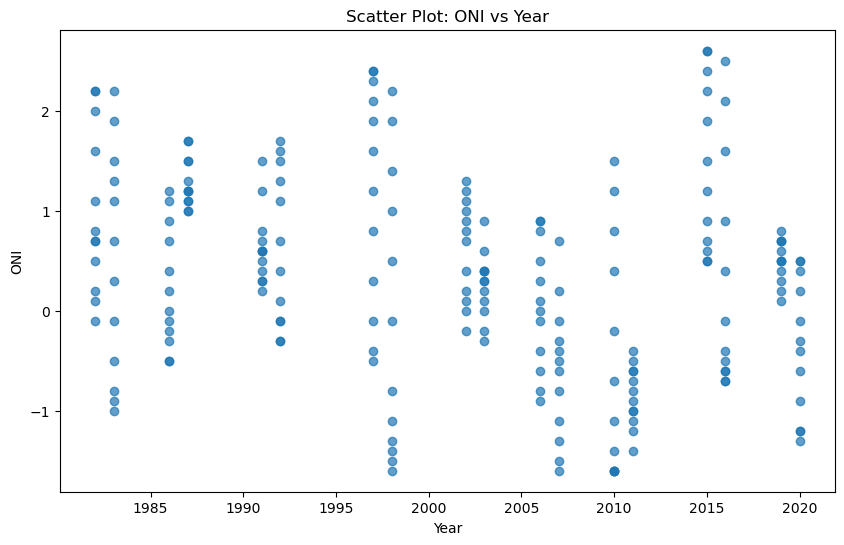

In [92]:
# Create the scatter plot
plt.figure(figsize=(10, 6))  # Adjust the figure size if needed
plt.scatter(filtered_df['Year'], filtered_df['ONI'], alpha=0.7)

# Set plot labels and title
plt.xlabel('Year')
plt.ylabel('ONI')
plt.title('Scatter Plot: ONI vs Year')

# Show the plot
plt.show()

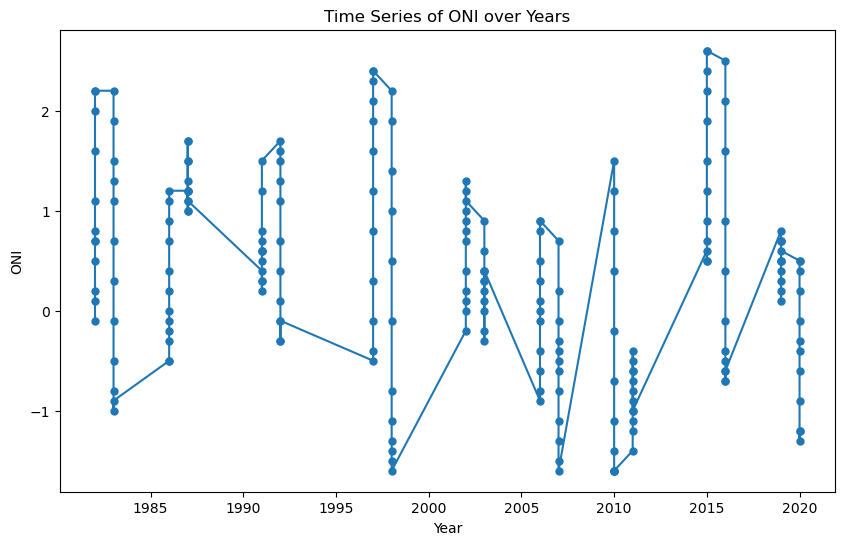

In [93]:
# Create the line plot
plt.figure(figsize=(10, 6))  # Adjust the figure size if needed
plt.plot(filtered_df['Year'], filtered_df['ONI'], marker='o', linestyle='-', markersize=5)

# Set plot labels and title
plt.xlabel('Year')
plt.ylabel('ONI')
plt.title('Time Series of ONI over Years')

# Show the plot
plt.show()

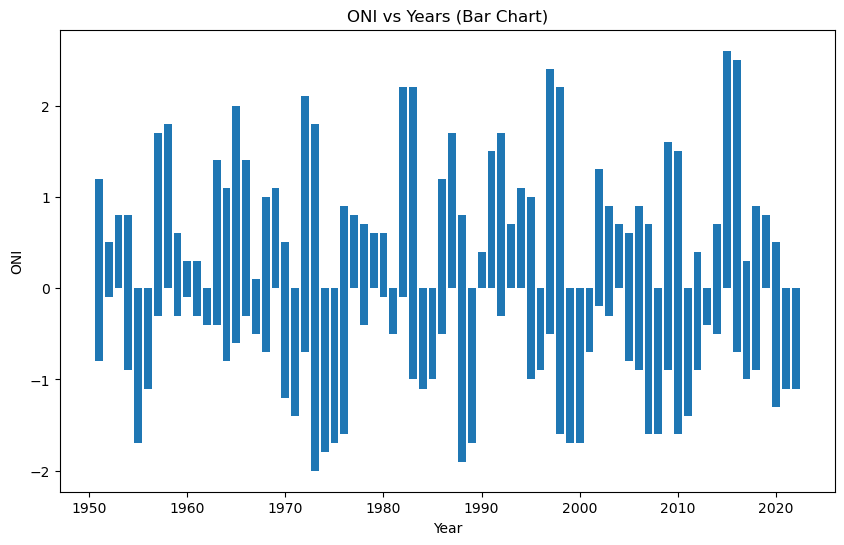

In [95]:
# Create the bar chart
plt.figure(figsize=(10, 6))  # Adjust the figure size if needed
plt.bar(df['Year'], df['ONI'])

# Set plot labels and title
plt.xlabel('Year')
plt.ylabel('ONI')
plt.title('ONI vs Years (Bar Chart)')

# Show the plot
plt.show()

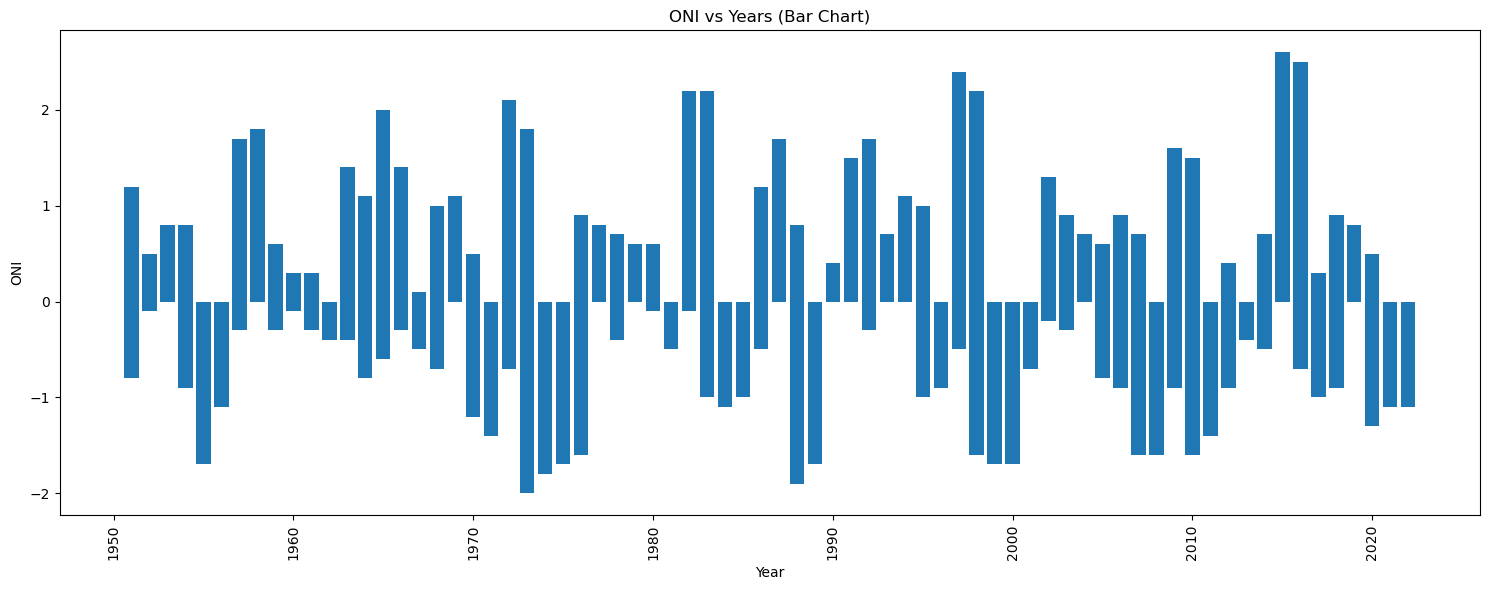

In [97]:
# Create the bar chart
plt.figure(figsize=(15, 6))  # Adjust the figure size for a wider chart
plt.bar(df['Year'], df['ONI'])

# Set plot labels and title
plt.xlabel('Year')
plt.ylabel('ONI')
plt.title('ONI vs Years (Bar Chart)')

# Rotate x-axis labels for better readability
plt.xticks(rotation=90)

# Show the plot
plt.tight_layout()  # Adjust spacing for better layout
plt.show()


In [222]:
#Normal data
# Filter the DataFrame to include data for the year 2019
Oni_data = df[df['Year'] == 2013]['ONI']

# Print the values of OLR for the year 2019
print(Oni_data)

744   -0.4
745   -0.4
746   -0.3
747   -0.3
748   -0.4
749   -0.4
750   -0.4
751   -0.3
752   -0.3
753   -0.2
754   -0.2
755   -0.3
Name: ONI, dtype: float64


In [220]:
#El nino happened
Oni_data = df[df['Year'] == 2010]['ONI']

# Print the values of OLR for the year 2019
print(Oni_data)

708    1.5
709    1.2
710    0.8
711    0.4
712   -0.2
713   -0.7
714   -1.1
715   -1.4
716   -1.6
717   -1.6
718   -1.6
719   -1.6
Name: ONI, dtype: float64


# Findings ONI:

Values of ONI has to have wider range from 0.5 up to 2.6 or 1.5 to -1.6 and has to be mostly positive numbers, 
Because normally its from 0.4 to -0.4

# Analyzing Precipitation (mm/day) data: 

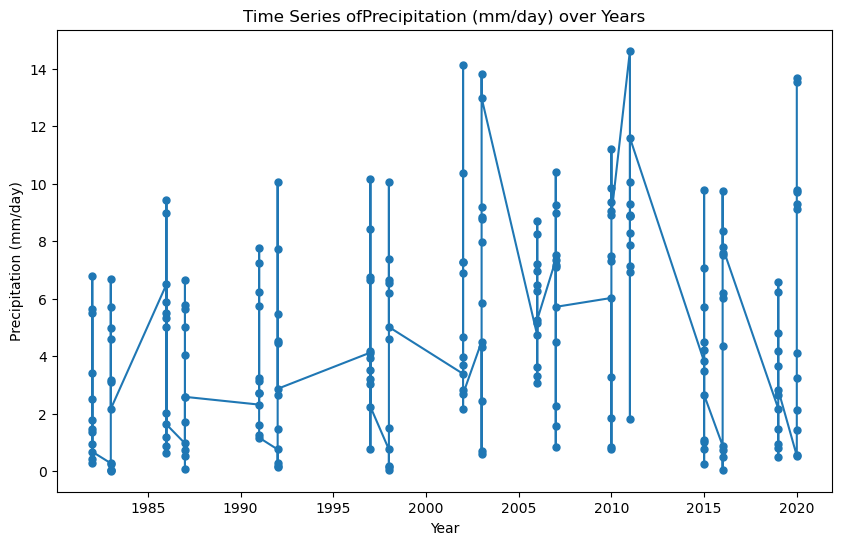

In [99]:
# Create the line plot
plt.figure(figsize=(10, 6))  # Adjust the figure size if needed
plt.plot(filtered_df['Year'], filtered_df['Precipitation (mm/day)'], marker='o', linestyle='-', markersize=5)

# Set plot labels and title
plt.xlabel('Year')
plt.ylabel('Precipitation (mm/day)')
plt.title('Time Series ofPrecipitation (mm/day) over Years')

# Show the plot
plt.show()

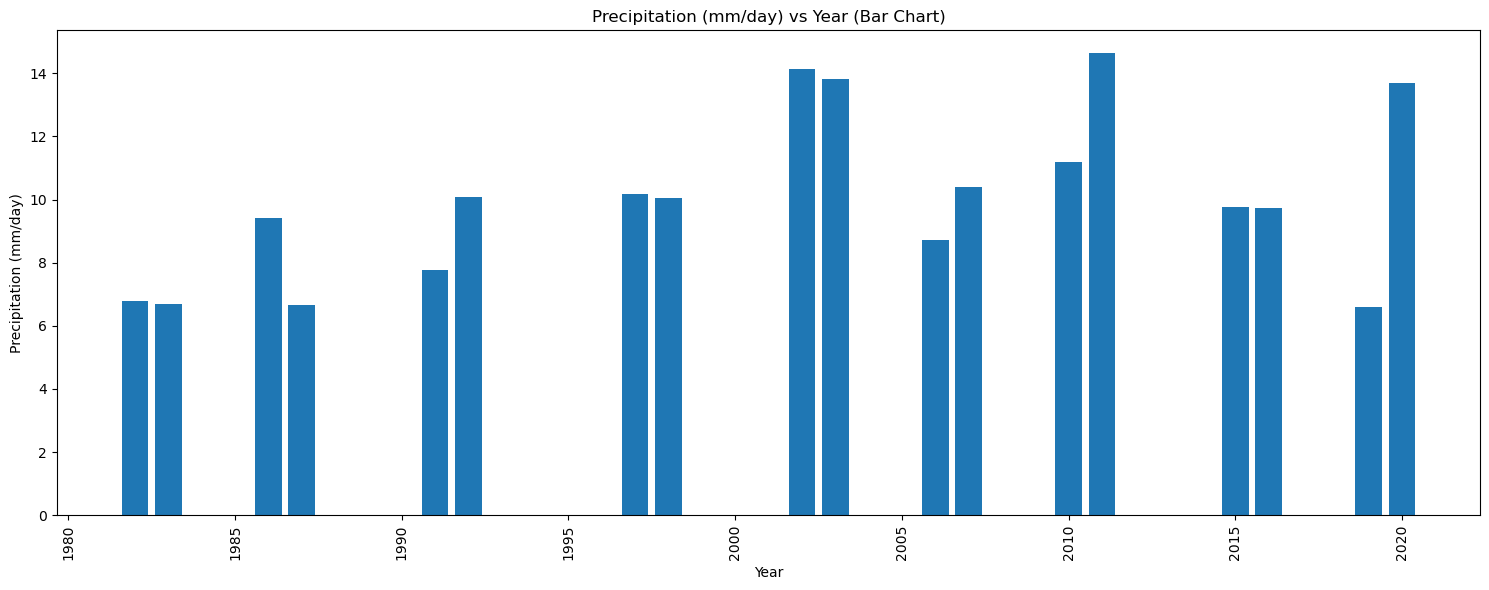

In [102]:
# Create the bar chart
plt.figure(figsize=(15, 6))  # Adjust the figure size for a wider chart
plt.bar(filtered_df['Year'], filtered_df['Precipitation (mm/day)'])

# Set plot labels and title
plt.xlabel('Year')
plt.ylabel('Precipitation (mm/day)')
plt.title('Precipitation (mm/day) vs Year (Bar Chart)')

# Rotate x-axis labels for better readability
plt.xticks(rotation=90)

# Show the plot
plt.tight_layout()  # Adjust spacing for better layout
plt.show()


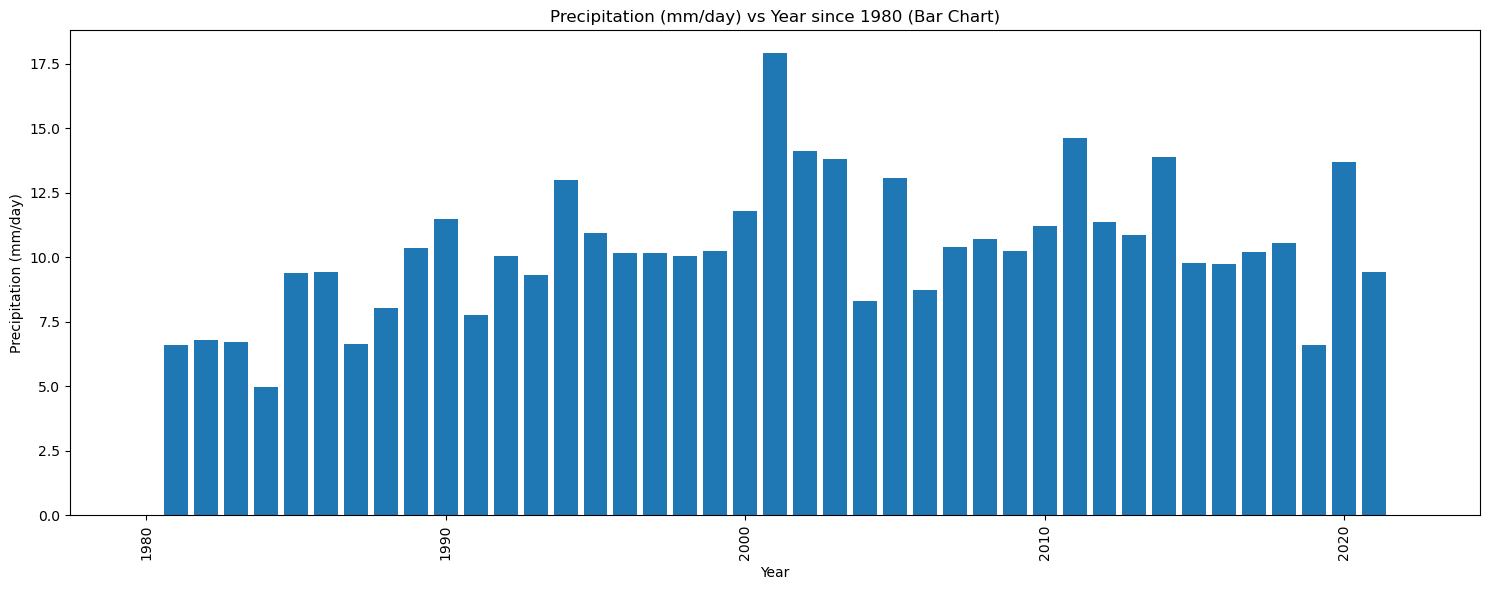

In [104]:
# Filter the DataFrame to include data from 1980 onwards
df_since_1980 = df[df['Year'] >= 1980]

# Create the bar chart
plt.figure(figsize=(15, 6))  # Adjust the figure size for a wider chart
plt.bar(df_since_1980['Year'], df_since_1980['Precipitation (mm/day)'])

# Set plot labels and title
plt.xlabel('Year')
plt.ylabel('Precipitation (mm/day)')
plt.title('Precipitation (mm/day) vs Year since 1980 (Bar Chart)')

# Rotate x-axis labels for better readability
plt.xticks(rotation=90)

# Show the plot
plt.tight_layout()  # Adjust spacing for better layout
plt.show()

In [267]:
#Normal weather
# Filter the DataFrame to include data for the year 2019
Precipitation = df[df['Year'] == 2017]['Precipitation (mm/day)']

# Print the values of OLR for the year ...
print(Precipitation)

792    10.22
793     2.50
794     3.73
795     3.11
796     7.30
797     6.14
798     6.28
799     7.95
800     7.57
801    10.04
802     8.01
803     7.30
Name: Precipitation (mm/day), dtype: float64


In [264]:
#El Nino 
# Filter the DataFrame to include data for the year 2019
Precipitation = df[df['Year'] == 2016]['Precipitation (mm/day)']

# Print the values of OLR for the year ...
print(Precipitation)

780    0.89
781    0.49
782    0.05
783    0.75
784    4.35
785    8.35
786    7.61
787    6.02
788    6.19
789    9.74
790    7.54
791    7.79
Name: Precipitation (mm/day), dtype: float64


# Findigns of Precipitation (mm/day)

After analyzing Precipitation (mm/day) we found that low precipitation around 0.80 - 7.79 is connected with El Nino data. Having low precipitation is connected with these events. Normally precipitation for example during year: 2017 values are between: 2.5 to 10.22 with average6.8

# Analyzing OLR data: 

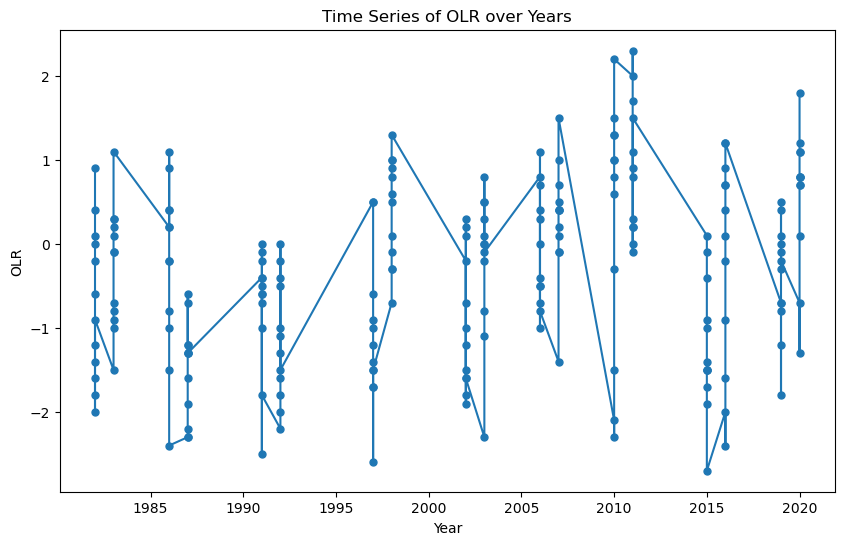

In [105]:
# Create the line plot
plt.figure(figsize=(10, 6))  # Adjust the figure size if needed
plt.plot(filtered_df['Year'], filtered_df['OLR'], marker='o', linestyle='-', markersize=5)

# Set plot labels and title
plt.xlabel('Year')
plt.ylabel('OLR')
plt.title('Time Series of OLR over Years')

# Show the plot
plt.show()

In [106]:
# Filter the DataFrame to include data for the year 2019
olr_2019 = df[df['Year'] == 2019]['OLR']

# Print the values of OLR for the year 2019
print(olr_2019)

816   -0.7
817   -1.8
818   -1.2
819   -0.8
820   -0.7
821   -0.3
822    0.1
823    0.0
824    0.5
825    0.4
826   -0.1
827   -0.2
Name: OLR, dtype: float64


In [112]:
# Filter the DataFrame to include data for the year 2019
olr_2019 = df[df['Year'] == 2018]['OLR']

# Print the values of OLR for the year 2019
print(olr_2019)

804    1.7
805    0.0
806    0.5
807    1.2
808    1.0
809    1.0
810    0.2
811    0.3
812    0.2
813    0.3
814   -0.5
815   -0.3
Name: OLR, dtype: float64


In [116]:
# Filter the DataFrame to include data for the year 2019
olr_2019 = df[df['Year'] == 2015]['OLR']

# Print the values of OLR for the year 2019
print(olr_2019)

768    0.1
769   -0.1
770   -1.9
771   -1.0
772   -0.9
773   -1.4
774   -0.4
775   -1.5
776   -1.7
777   -1.5
778   -1.5
779   -2.7
Name: OLR, dtype: float64


# Findings: ORL

Because of negative values of OLR we found out that this is happening during El Nino weather. When it comes to that values are from -1.8 to 1.8. When there is no El Nino values are -0.4 to 1.7

In [248]:
#Normal weather data
# Filter the DataFrame to include data for the year 2019
ONI_data = df[df['Year'] == 2013]['ONI']

# Print the values of OLR for the year ...
print(ONI_data)

744   -0.4
745   -0.4
746   -0.3
747   -0.3
748   -0.4
749   -0.4
750   -0.4
751   -0.3
752   -0.3
753   -0.2
754   -0.2
755   -0.3
Name: ONI, dtype: float64


In [247]:
#El Nino data
# Filter the DataFrame to include data for the year 2019
ONI_data = df[df['Year'] == 2015]['ONI']

# Print the values of OLR for the year ...
print(ONI_data)

768    0.6
769    0.5
770    0.5
771    0.7
772    0.9
773    1.2
774    1.5
775    1.9
776    2.2
777    2.4
778    2.6
779    2.6
Name: ONI, dtype: float64


AFter analyzing data we found that values of ONI during El Nino has to be all positive and between 0.6 to 2.6.
Normally those values are negative and close to 0(0.4 to - 0.3)

# Analyzing TNI

In [249]:
#Normal Weather
# Filter the DataFrame to include data for the year 2019
ONI_data = df[df['Year'] == 2018]['TNI']

# Print the values of OLR for the year ...
print(ONI_data)

804   -1.13
805   -1.26
806   -1.32
807   -1.65
808   -1.98
809   -2.12
810   -2.09
811   -2.16
812   -1.98
813   -1.89
814   -1.73
815   -1.70
Name: TNI, dtype: float64


In [252]:
#El Nino
# Filter the DataFrame to include data for the year 2019
ONI_data = df[df['Year'] == 2020]['TNI']

# Print the values of OLR for the year ...
print(ONI_data)

828   -2.21
829   -2.03
830   -1.81
831   -1.76
832   -1.89
833   -1.86
834   -1.72
835   -1.59
836   -1.09
837   -0.44
838    0.17
839    0.57
Name: TNI, dtype: float64


# TNI Findings:

After analyzing data we can see that year when TNI is having wider range of values like 0.57 to -2.21 is El Nino happening. 
Compare to normal year when you have values with minimum range: -1.13 to -1.70

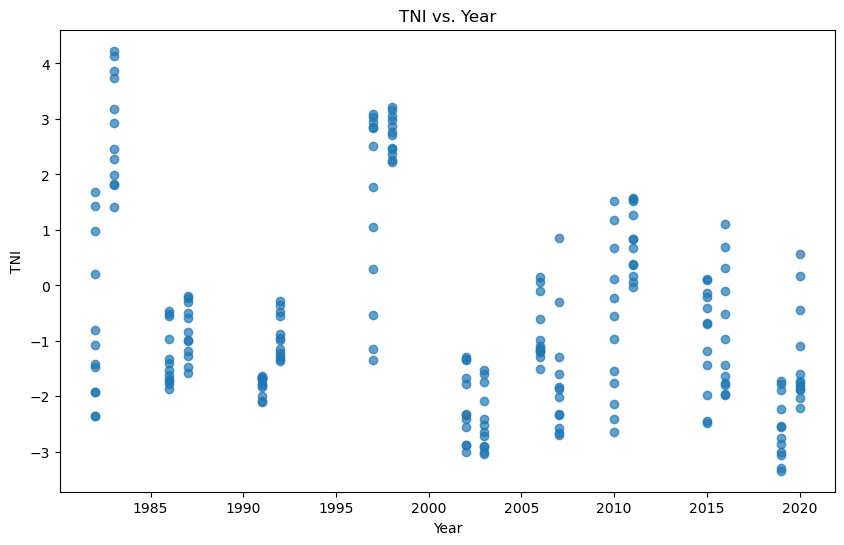

In [174]:
# Create the scatter plot
plt.figure(figsize=(10, 6))  # Adjust the figure size if needed
plt.scatter(filtered_df['Year'], filtered_df['TNI'], alpha=0.7)

# Set plot labels and title
plt.xlabel('Year')
plt.ylabel('TNI')
plt.title('TNI vs. Year')

# Show the plot
plt.show()

# Analyzing PNA data

In [235]:
#Normal weather
# Filter the DataFrame to include data for the year 2019
PNA_data = df[df['Year'] == 2014]['PNA']

# Print the values of OLR for the year ...
print(PNA_data)

756    0.59
757   -1.57
758   -0.50
759    0.00
760   -0.59
761   -1.44
762    0.50
763    1.35
764    0.78
765    1.14
766    0.64
767    0.37
Name: PNA, dtype: float64


In [242]:
#El Nino weather
# Filter the DataFrame to include data for the year 2019
PNA_data = df[df['Year'] == 2020]['PNA']

# Print the values of OLR for the year ...
print(PNA_data)

828   -0.95
829   -0.07
830   -2.41
831   -1.38
832    0.27
833    0.86
834    1.20
835    1.80
836    0.59
837   -1.08
838    0.21
839    1.28
Name: PNA, dtype: float64


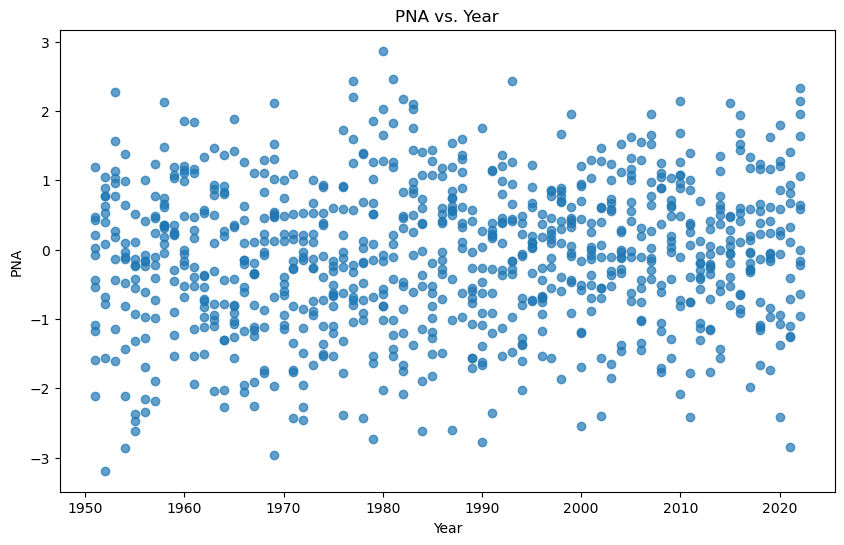

In [183]:
# Create the scatter plot
plt.figure(figsize=(10, 6))  # Adjust the figure size if needed
plt.scatter(df['Year'], df['PNA'], alpha=0.7)

# Set plot labels and title
plt.xlabel('Year')
plt.ylabel('PNA')
plt.title('PNA vs. Year')

# Show the plot
plt.show()

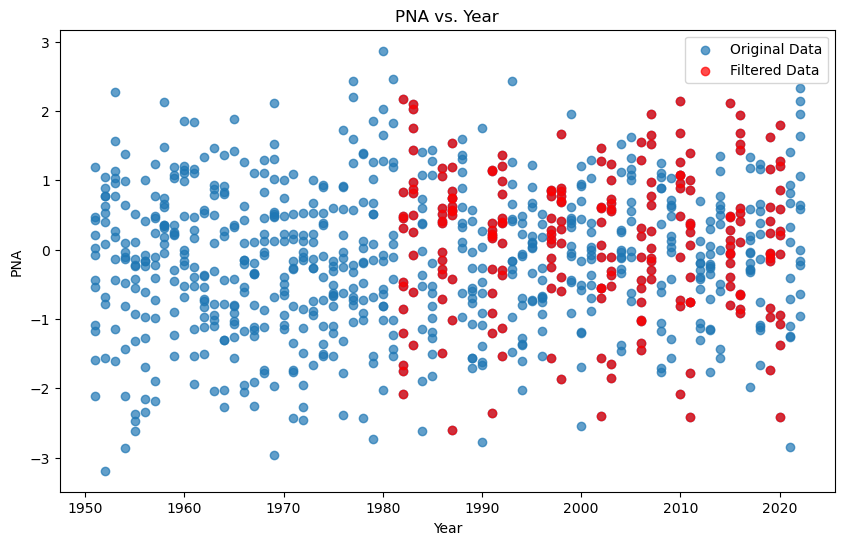

In [184]:
# Create the scatter plot for df
plt.figure(figsize=(10, 6))
plt.scatter(df['Year'], df['PNA'], alpha=0.7, label='Original Data')

# Create the scatter plot for filtered_df (using red color)
plt.scatter(filtered_df['Year'], filtered_df['PNA'], alpha=0.7, c='red', label='Filtered Data')

# Set plot labels and title
plt.xlabel('Year')
plt.ylabel('PNA')
plt.title('PNA vs. Year')

# Show the legend to distinguish the two datasets
plt.legend()

# Show the plot
plt.show()

# Findings of PNA

As you can see the red values are outliers. So wider range in certain year is connected to El Nino weather. 
But the range of values is not too much. PNA has to have wider range and more negative values during year. For example -2.41 to 1.80

# Analyzing SOI Data 

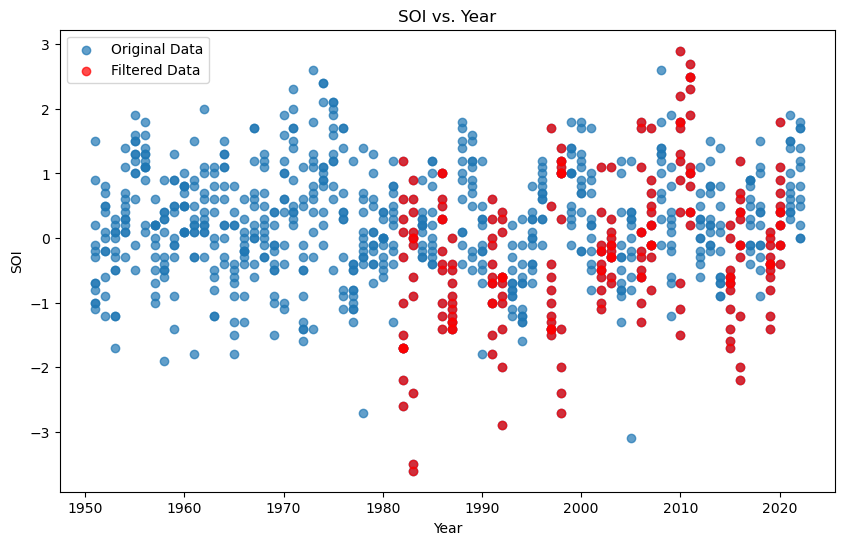

In [185]:
# Create the scatter plot for df
plt.figure(figsize=(10, 6))
plt.scatter(df['Year'], df['SOI'], alpha=0.7, label='Original Data')

# Create the scatter plot for filtered_df (using red color)
plt.scatter(filtered_df['Year'], filtered_df['SOI'], alpha=0.7, c='red', label='Filtered Data')

# Set plot labels and title
plt.xlabel('Year')
plt.ylabel('SOI')
plt.title('SOI vs. Year')

# Show the legend to distinguish the two datasets
plt.legend()

# Show the plot
plt.show()

In [253]:
#Normal weather
# Filter the DataFrame to include data for the year 2019
PNA_data = df[df['Year'] == 2013]['SOI']

# Print the values of OLR for the year ...
print(PNA_data)

744   -0.1
745   -0.2
746    1.5
747    0.2
748    0.8
749    1.2
750    0.8
751    0.2
752    0.3
753   -0.1
754    0.7
755    0.1
Name: SOI, dtype: float64


In [256]:
#El Nino
# Filter the DataFrame to include data for the year 2019
PNA_data = df[df['Year'] == 2016]['SOI']

# Print the values of OLR for the year ...
print(PNA_data)

780   -2.2
781   -2.0
782   -0.1
783   -1.2
784    0.4
785    0.6
786    0.4
787    0.7
788    1.2
789   -0.3
790   -0.1
791    0.3
Name: SOI, dtype: float64


# Findings of SOI

We found out that during year of EL Nino the values have wider range 1.8 to -0.1 compare to natural values: -0.1 to 07 

# Checking NINO 3.4 SST Anomalies data 

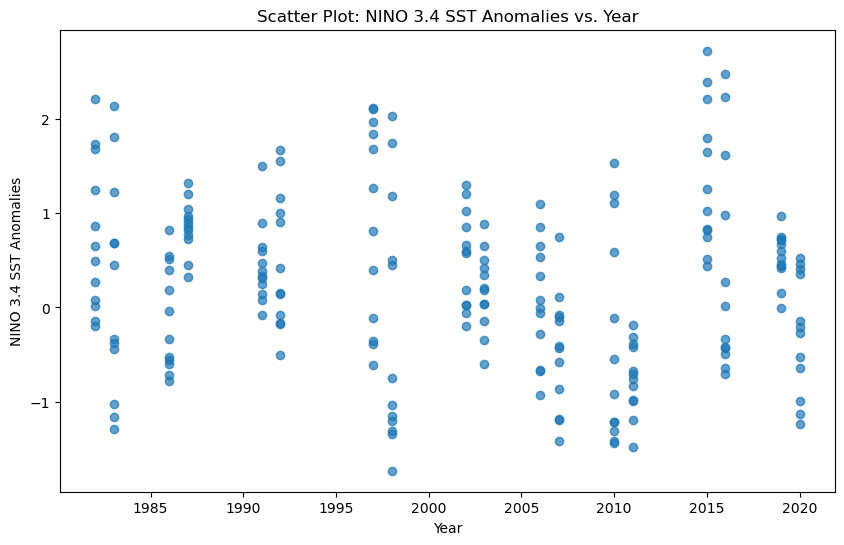

In [223]:
import matplotlib.pyplot as plt

# Assuming 'df' is the DataFrame containing your data
# Make sure the 'Year' column and 'NINO 3.4 SST Anomalies' column are numeric (int or float).

# Create the scatter plot
plt.figure(figsize=(10, 6))  # Adjust the figure size if needed
plt.scatter(filtered_df['Year'], filtered_df['NINO 3.4 SST Anomalies'], alpha=0.7)

# Set plot labels and title
plt.xlabel('Year')
plt.ylabel('NINO 3.4 SST Anomalies')
plt.title('Scatter Plot: NINO 3.4 SST Anomalies vs. Year')

# Show the plot
plt.show()


In [229]:
#No EL NINO Weather
# Filter the DataFrame to include data for the year 2019
nino_data = df[df['Year'] == 2018]['NINO 3.4 SST Anomalies']

# Print the values of OLR for the year ...
print(nino_data)

804   -0.70
805   -0.67
806   -0.73
807   -0.49
808   -0.11
809    0.15
810    0.22
811    0.28
812    0.33
813    0.86
814    0.86
815    0.90
Name: NINO 3.4 SST Anomalies, dtype: float64


In [233]:
#EL NINO WEATHER
# Filter the DataFrame to include data for the year 2019
nino_data = df[df['Year'] == 2015]['NINO 3.4 SST Anomalies']

# Print the values of OLR for the year ...
print(nino_data)

768    0.51
769    0.75
770    0.44
771    0.82
772    0.83
773    1.02
774    1.26
775    1.65
776    1.79
777    2.21
778    2.72
779    2.39
Name: NINO 3.4 SST Anomalies, dtype: float64


# Findings of NINO 3.4 SST Anomalies

We found that NINO 3.4 SST Anomalies values has to be wider range. For example 0.51 to 2.39. 
When its not EL NINO the values are closer together: 0.90 to -0.70

# SUMMARY

After analyzing El Nino data we found out that:
- PNA has to have wider range and more negative values during year. For example -2.41 to 1.80
- ORL must be -1 to -1.8 so it has be negative values.
- Low precipitation around 0.80 - 7.79 is connected with El Nino data.
- ONI values has to have wider range from 0.5 up to 2.6 or 1.5 to -1.6 and has to be mostly positive numbers, Because         normally its from 0.4 to -0.4 
- TNI is having wider range of values like 0.57 to -2.21 is El Nino happening. Compare to normal year when you have values   with minimum range: -1.13 to -1.70
- ORL during El Nino weather. Values are from -1.8 to 1.8. Wider range. When there is no El Nino values are -0.4 to 1.7
- SOI During year of EL Nino the values have wider range 1.8 to -0.1 compare to natural values: -0.1 to 0.7 

Creating new column when El Nino happen. Yes or no and then saving it. 
Also creating a new dataframe el_nino_df which consist only data from years when El Nino happened for further analysis
using machine learning models. 

In [273]:
# List of years that are associated with El Niño events
el_nino_years = [1979, 1980, 1982, 1983, 1986, 1987, 1991, 1992, 1997, 1998, 2002, 2003, 2006, 2007, 2010, 2011, 2015, 2016, 2019, 2020]

# Create a new column 'el_nino' with 'Yes' for matching years, 'No' for others
df['el_nino'] = df['Year'].apply(lambda year: 'Yes' if year in el_nino_years else 'No')

# Print the DataFrame to see the new 'el_nino' column
print(df)

# Save the updated DataFrame with the new 'el_nino' column to a CSV file
df.to_csv(r'C:\Users\User\Downloads\elnino_data2.csv', index=False)

          Date  Year Month    Season  ONI  NINO 1+2 SST  \
0     1/1/1951  1951   JAN  DJF 1951 -0.8          0.00   
1     2/1/1951  1951   FEB  JFM 1951 -0.5          0.00   
2     3/1/1951  1951   MAR  FMA 1951 -0.2          0.00   
3     4/1/1951  1951   APR  MAM 1951  0.2          0.00   
4     5/1/1951  1951   MAY  AMJ 1951  0.4          0.00   
..         ...   ...   ...       ...  ...           ...   
859   8/1/2022  2022   AUG  JAS 2022  0.0         19.53   
860   9/1/2022  2022   SEP  ASO 2022  0.0         18.29   
861  10/1/2022  2022   OCT  SON 2022  0.0         16.64   
862  11/1/2022  2022   NOV  OND 2022  0.0         14.71   
863  12/1/2022  2022   DEC  NDJ 2023  0.0         12.77   

     NINO 1+2 SST Anomalies  NINO 3 SST  NINO 3 SST Anomalies  NINO 3.4 SST  \
0                      0.00        0.00                  0.00          0.00   
1                      0.00        0.00                  0.00          0.00   
2                      0.00        0.00               

In [270]:
# Create a new DataFrame 'el_nino_df' containing only the rows where 'el_nino' is 'Yes'
el_nino_df = df[df['el_nino'] == 'Yes'].copy()

# Print the new DataFrame 'el_nino_df'
print(el_nino_df)

          Date  Year Month    Season  ONI  NINO 1+2 SST  \
336   1/1/1979  1979   JAN  DJF 1979  0.0          0.00   
337   2/1/1979  1979   FEB  JFM 1979  0.1          0.00   
338   3/1/1979  1979   MAR  FMA 1979  0.2          0.00   
339   4/1/1979  1979   APR  MAM 1979  0.3          0.00   
340   5/1/1979  1979   MAY  AMJ 1979  0.2          0.00   
..         ...   ...   ...       ...  ...           ...   
835   8/1/2020  2020   AUG  JAS 2020 -0.6         20.17   
836   9/1/2020  2020   SEP  ASO 2020 -0.9         19.82   
837  10/1/2020  2020   OCT  SON 2020 -1.2         20.12   
838  11/1/2020  2020   NOV  OND 2020 -1.3         20.95   
839  12/1/2020  2020   DEC  NDJ 2020 -1.2         21.98   

     NINO 1+2 SST Anomalies  NINO 3 SST  NINO 3 SST Anomalies  NINO 3.4 SST  \
336                    0.00        0.00                  0.00          0.00   
337                    0.00        0.00                  0.00          0.00   
338                    0.00        0.00               

In [275]:
el_nino_df

,Date,Year,Month,Season,ONI,NINO 1+2 SST,NINO 1+2 SST Anomalies,NINO 3 SST,NINO 3 SST Anomalies,NINO 3.4 SST,NINO 3.4 SST Anomalies,NINO 4 SST,NINO 4 SST Anomalies,OLR,TNI,PNA,Precipitation (mm/day),SOI,el_nino
336,1/1/1979,1979,JAN,DJF 1979,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,-0.7,-0.34,-1.54,0.00,-0.4,Yes
337,2/1/1979,1979,FEB,JFM 1979,0.1,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,-0.6,-0.31,-2.73,0.00,1.0,Yes
338,3/1/1979,1979,MAR,FMA 1979,0.2,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,-0.3,-0.35,0.08,0.00,0.1,Yes
339,4/1/1979,1979,APR,MAM 1979,0.3,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.3,-0.19,-0.15,0.00,-0.1,Yes
340,5/1/1979,1979,MAY,AMJ 1979,0.2,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.07,1.27,0.00,0.5,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
835,8/1/2020,2020,AUG,JAS 2020,-0.6,20.17,-0.69,24.79,-0.43,26.38,-0.52,28.36,-0.34,0.8,-1.59,1.80,9.14,1.1,Yes
836,9/1/2020,2020,SEP,ASO 2020,-0.9,19.82,-0.76,24.21,-0.80,26.12,-0.64,28.25,-0.43,0.8,-1.09,0.59,4.12,0.9,Yes
837,10/1/2020,2020,OCT,SON 2020,-1.2,20.12,-0.76,24.19,-0.90,25.64,-1.13,27.97,-0.71,1.1,-0.44,-1.08,13.68,0.5,Yes
838,11/1/2020,2020,NOV,OND 2020,-1.3,20.95,-0.67,24.17,-1.03,25.59,-1.23,27.98,-0.70,1.2,0.17,0.21,9.29,0.7,Yes


In [274]:
df.head()

,Date,Year,Month,Season,ONI,NINO 1+2 SST,NINO 1+2 SST Anomalies,NINO 3 SST,NINO 3 SST Anomalies,NINO 3.4 SST,NINO 3.4 SST Anomalies,NINO 4 SST,NINO 4 SST Anomalies,OLR,TNI,PNA,Precipitation (mm/day),SOI,el_nino
0,1/1/1951,1951,JAN,DJF 1951,-0.8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.32,-1.18,0.0,1.5,No
1,2/1/1951,1951,FEB,JFM 1951,-0.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.46,-2.11,0.0,0.9,No
2,3/1/1951,1951,MAR,FMA 1951,-0.2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.59,-1.09,0.0,-0.1,No
3,4/1/1951,1951,APR,MAM 1951,0.2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.46,0.47,0.0,-0.3,No
4,5/1/1951,1951,MAY,AMJ 1951,0.4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.62,1.19,0.0,-0.7,No


# MACHINE LEARNING

 Creating models and their evaluation